# Exploratory Data Analysis (EDA)
This portion of the project will explore and model meaninful relationships found within the cleaned data.

In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import joypy

<IPython.core.display.Javascript object>

In [3]:
# read in the dataframe cleaned in the Data Cleaning notebook
file = os.path.join("CPIA Shared Innovation.csv")
CPIA_shared_innovation = pd.read_csv(file)

<IPython.core.display.Javascript object>

In [4]:
# pivot the dataframe to look at each country's indicator value
CPIA_shared_innovation_pivot = CPIA_shared_innovation.pivot_table(
    index=["country_name"], columns=["indicator_name"], values=["value"]
)

<IPython.core.display.Javascript object>

In [5]:
# rename the columns
CPIA_shared_innovation_pivot.columns = [
    "Business Regulatory Environment",
    "Debt Policy",
    "Environmental Sustainability",
    "Budgetary & Financial Management",
    "Financial Sector",
    "Fiscal Policy",
    "Gender Equality",
    "Building Human Resources",
    "Macroeconomic Management",
    "Public Administration",
    "Public Resource Use",
    "Property Rights Governance",
    "Social Protection",
    "Efficiency of Revenue Mobilization",
    "Trade Rating",
    "Corruption",
]
CPIA_shared_innovation_pivot

,Business Regulatory Environment,Debt Policy,Environmental Sustainability,Budgetary & Financial Management,Financial Sector,Fiscal Policy,Gender Equality,Building Human Resources,Macroeconomic Management,Public Administration,Public Resource Use,Property Rights Governance,Social Protection,Efficiency of Revenue Mobilization,Trade Rating,Corruption
country_name,,,,,,,,,,,,,,,,
Arab World,3.200000,2.900000,2.400000,3.000000,2.900000,2.400000,2.800000,2.700000,2.700000,2.700000,2.500000,2.600000,2.400000,2.700000,3.300000,2.200000
Bangladesh,4.000000,3.000000,4.000000,3.000000,3.500000,2.500000,3.500000,3.000000,3.500000,3.000000,2.500000,3.000000,2.500000,3.500000,3.500000,2.500000
Bhutan,4.500000,3.500000,4.000000,4.000000,4.500000,3.000000,4.000000,4.000000,4.500000,4.000000,4.000000,4.000000,4.000000,3.000000,3.500000,4.500000
Burkina Faso,4.000000,3.500000,4.000000,3.500000,4.000000,3.000000,3.000000,3.500000,4.000000,4.000000,3.000000,3.500000,3.500000,3.000000,4.000000,3.500000
Burundi,4.000000,3.000000,2.500000,3.000000,3.500000,2.500000,3.000000,4.000000,2.500000,3.000000,2.000000,2.500000,2.500000,3.000000,4.000000,1.500000
Cabo Verde,4.500000,3.500000,2.500000,4.000000,3.500000,3.500000,3.500000,4.000000,4.000000,3.500000,4.000000,3.500000,4.000000,4.000000,4.500000,4.500000
Cambodia,4.000000,2.500000,5.000000,3.500000,3.500000,3.000000,3.500000,4.000000,4.000000,3.000000,2.500000,3.000000,2.500000,2.500000,4.500000,1.500000
Cameroon,3.500000,3.000000,3.500000,3.500000,3.000000,3.000000,3.500000,3.000000,4.000000,3.500000,2.500000,3.500000,3.000000,3.000000,4.000000,2.500000
Caribbean small states,4.300000,3.400000,3.100000,3.800000,3.200000,3.400000,3.300000,3.400000,3.500000,3.500000,3.700000,3.100000,3.400000,3.400000,3.900000,3.900000


<IPython.core.display.Javascript object>

(1.25, 5.25)

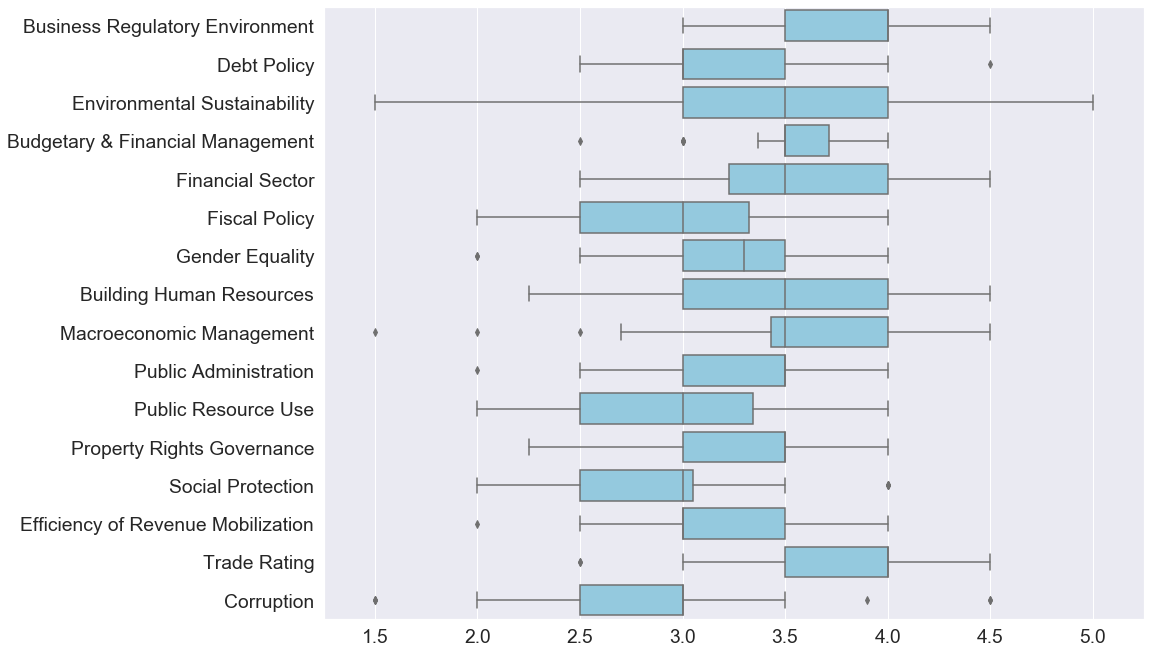

<IPython.core.display.Javascript object>

In [6]:
# draw the Box Plot
sns.set(
    style="darkgrid",
    context="notebook",
    font_scale=1.75,
    rc={"figure.figsize": (14.7, 11.27)},
)
ax = sns.boxplot(data=CPIA_shared_innovation_pivot, orient="h", color="skyblue")
ax.set_xlim(1.25, 5.25)

#### <font color=white>The box plot shown serves to give a general sense of the CPIA's Indicator Distribution.
 - Although the official range of possible ratings is 1 to 6, no country received a score of 6. 
 - The highest score is seen with the Environmental Sustainability category. 
 - Most median scores appear to fall within the 3 to 3.5 range. 
 - The categories receiving the worst scores appear to be the Social Protection and Corruption categories.</font>

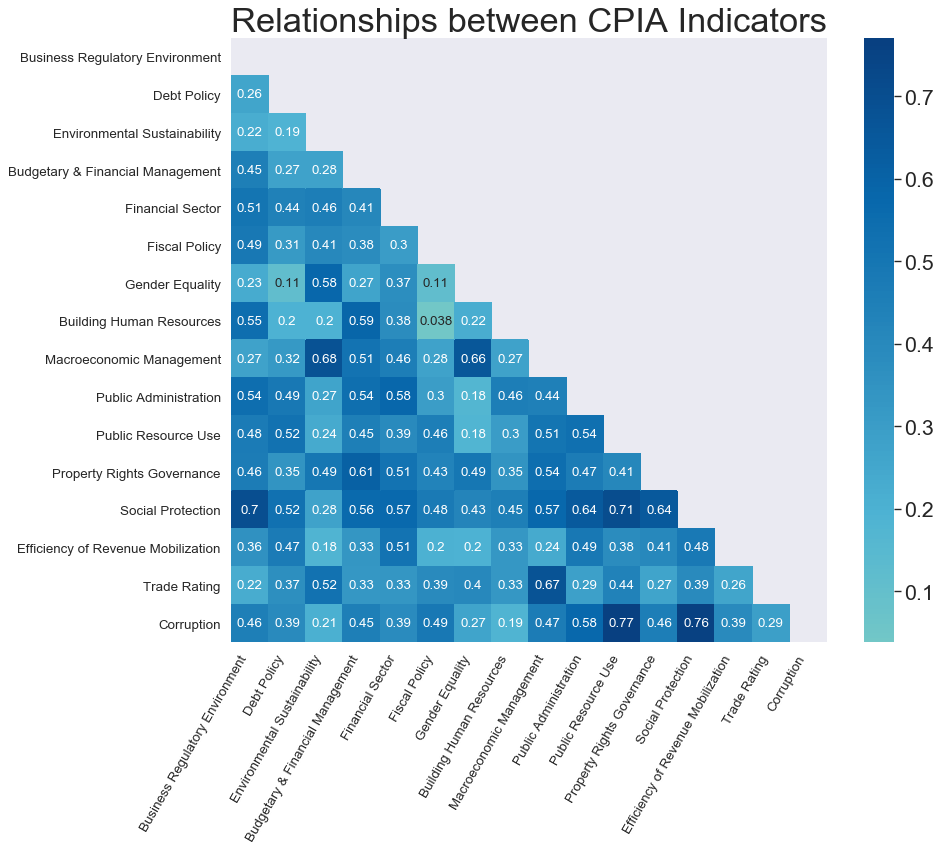

<IPython.core.display.Javascript object>

In [7]:
# draw the correlogram
plt.figure(figsize=(12, 10), dpi=80)
CPIA_shared_innovation_pivot_corr = CPIA_shared_innovation_pivot.corr()

mask = np.zeros_like(CPIA_shared_innovation_pivot_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(
    CPIA_shared_innovation_pivot_corr,
    mask=mask,
    cmap="GnBu",
    center=0,
    annot=True,
    annot_kws={"size": 12},
)

plt.title("Relationships between CPIA Indicators", fontsize=31)
plt.xticks(fontsize=12, rotation=60, horizontalalignment="right")
plt.yticks(fontsize=12)
plt.show()

#### The correlogram shown serves to show where relationships between indicators exist. This may prove useful to countries looking to understand where to concentrate efforts for the most impact, i.e. if the improvment of one indicator would translate to another's improvement by default. The strongest relationships here appear to be:
 - Public Resource Use & Corruption
 - Social Protection & Corruption
 - Public Resource Use and Social Protection
 - Business Regulatory Environment and Social Protection
 - Environmental Sustainability & Macroeconomic Management

## Comparing the Global Innovation Index to CPIA Indicator Scores.

In [8]:
"""In order to get an overview of how the CPIA Indicators compare to the Global Innovation Index, 
first sum the CPIA indicator values."""
sum_of_indicators = CPIA_shared_innovation_pivot.sum(axis=1)
sum_of_indicators = sum_of_indicators.sort_values(ascending=False)
CPIA_sum_of_indicators = pd.DataFrame(sum_of_indicators)
CPIA_sum_of_indicators.columns = [["CPIA_Indicator"]]
CPIA_sum_of_indicators.reset_index(inplace=True)

<IPython.core.display.Javascript object>

In [9]:
CPIA_sum_of_indicators.columns = CPIA_sum_of_indicators.columns.get_level_values(0)

<IPython.core.display.Javascript object>

In [10]:
# read in the GII Shared Innovation CSV
path = os.path.join("GII Shared Innovation.csv")
file = pd.read_csv(path)
GII_Shared_Innovation = pd.DataFrame(file)

<IPython.core.display.Javascript object>

In [11]:
# merge the CPIA sum_of_indicators dataframe with the Global Innovation Index
result = pd.merge(
    CPIA_sum_of_indicators,
    GII_Shared_Innovation[["Ranks"]],
    left_on=CPIA_sum_of_indicators["country_name"],
    right_on=GII_Shared_Innovation["Countries"],
)
result.drop("key_0", axis=1, inplace=True)
result.columns = [["Countries", "CPIA_Sum_of_Indicators", "GII_Rank"]]

<IPython.core.display.Javascript object>

In [12]:
result.columns = result.columns.get_level_values(0)

<IPython.core.display.Javascript object>

In [13]:
# sort the dataframe by GII Rank
result = result.sort_values(by="GII_Rank")
result

,Countries,CPIA_Sum_of_Indicators,GII_Rank
42,Sudan,36.500000,14.950000
28,Togo,51.500000,18.430000
30,Guinea,50.500000,18.490000
37,Myanmar,47.000000,20.270000
39,Burundi,46.500000,21.040000
15,Nepal,55.000000,21.080000
18,Niger,53.500000,21.220000
38,Zimbabwe,46.500000,22.520000
29,Pakistan,51.000000,23.070000
12,Nicaragua,55.500000,23.470000


<IPython.core.display.Javascript object>

Text(34.125, 0.5, 'GII Rank')

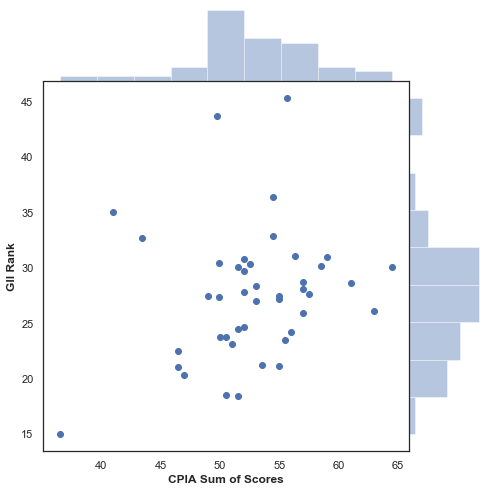

<IPython.core.display.Javascript object>

In [14]:
# draw the jointplot
sns.set(style="white")

g = sns.jointplot(
    result["CPIA_Sum_of_Indicators"], result["GII_Rank"], height=7, space=0,
)
g.ax_joint.set_xlabel("CPIA Sum of Scores", fontweight="bold")
g.ax_joint.set_ylabel("GII Rank", fontweight="bold")

#### This plot indicates that although a positive relationship does seem to exist between a region's cumulative CPIA Scores and its Global Innovation Index Score, a number of outliers cast doubt on the strenghth on this relationsip.

##### Filter the data to return the Top Ten Best Performers on the Global Innovation Index.

In [15]:
# index the dataframe to return the top 10 countries scoring best on the GII
best_performers = result.sort_values("GII_Rank")[-10:]
best_performers

,Countries,CPIA_Sum_of_Indicators,GII_Rank
33,Sub-Saharan Africa,49.947368,30.460000
23,Guyana,52.000000,30.750000
3,Senegal,59.000000,30.950000
9,Caribbean small states,56.300000,31.065000
40,Arab World,43.400000,32.683636
17,Latin America & Caribbean,54.437500,32.816667
41,Middle East & North Africa,41.000000,35.040000
16,Mongolia,54.500000,36.410000
35,East Asia & Pacific,49.714286,43.671818
11,Europe & Central Asia,55.600000,45.334091


<IPython.core.display.Javascript object>

In [16]:
# get the CPIA data for 10 best performing countries on the GII
best_shared = CPIA_shared_innovation.loc[
    CPIA_shared_innovation["country_name"].isin(best_performers["Countries"])
]
best_shared = best_shared.drop("Unnamed: 0", axis=1)
best_shared.insert(5, "best", "1", True)

<IPython.core.display.Javascript object>

##### Here, the data is re-formatted into a structure suitable to be shown as a Ridgeline Plot.

In [17]:
best_shared_subset = best_shared[["indicator_code", "value"]]
best_shared_subset = best_shared_subset.rename(columns={"value": "best"})
best_shared_subset

,indicator_code,best
0,IQ.CPA.BREG.XQ,2.900000
8,IQ.CPA.BREG.XQ,3.400000
10,IQ.CPA.BREG.XQ,2.750000
12,IQ.CPA.BREG.XQ,3.600000
15,IQ.CPA.BREG.XQ,2.500000
...,...,...
663,IQ.CPA.TRAN.XQ,3.437500
668,IQ.CPA.TRAN.XQ,2.000000
669,IQ.CPA.TRAN.XQ,3.000000
679,IQ.CPA.TRAN.XQ,3.500000


<IPython.core.display.Javascript object>

##### Filter the data to return the Top Ten Best Performers on the Global Innovation Index.

In [18]:
worst_performers = result.sort_values("GII_Rank", ascending=False)[-10:]
worst_performers

,Countries,CPIA_Sum_of_Indicators,GII_Rank
12,Nicaragua,55.5,23.47
29,Pakistan,51.0,23.07
38,Zimbabwe,46.5,22.52
18,Niger,53.5,21.22
15,Nepal,55.0,21.08
39,Burundi,46.5,21.04
37,Myanmar,47.0,20.27
30,Guinea,50.5,18.49
28,Togo,51.5,18.43
42,Sudan,36.5,14.95


<IPython.core.display.Javascript object>

In [19]:
# get the CPIA data for 10 best performing countries on the GII
worst_shared = CPIA_shared_innovation.loc[
    CPIA_shared_innovation["country_name"].isin(worst_performers["Countries"])
]
worst_shared = worst_shared.drop("Unnamed: 0", axis=1)
worst_shared

,country_name,year,indicator_code,indicator_name,value
4,Burundi,2018,IQ.CPA.BREG.XQ,CPIA business regulatory environment rating (1...,3.0
14,Guinea,2018,IQ.CPA.BREG.XQ,CPIA business regulatory environment rating (1...,3.0
26,Myanmar,2018,IQ.CPA.BREG.XQ,CPIA business regulatory environment rating (1...,2.5
27,Nepal,2018,IQ.CPA.BREG.XQ,CPIA business regulatory environment rating (1...,3.5
28,Nicaragua,2018,IQ.CPA.BREG.XQ,CPIA business regulatory environment rating (1...,3.0
...,...,...,...,...,...
674,Niger,2018,IQ.CPA.TRAN.XQ,"CPIA transparency, accountability, and corrupt...",3.0
677,Pakistan,2018,IQ.CPA.TRAN.XQ,"CPIA transparency, accountability, and corrupt...",3.0
681,Sudan,2018,IQ.CPA.TRAN.XQ,"CPIA transparency, accountability, and corrupt...",1.5
683,Togo,2018,IQ.CPA.TRAN.XQ,"CPIA transparency, accountability, and corrupt...",3.0


<IPython.core.display.Javascript object>

##### The data is re-structured so that it may be modeled by a Ridgeline Plot.

In [20]:
worst_shared.insert(5, "worst", "0", True)
worst_shared

,country_name,year,indicator_code,indicator_name,value,worst
4,Burundi,2018,IQ.CPA.BREG.XQ,CPIA business regulatory environment rating (1...,3.0,0
14,Guinea,2018,IQ.CPA.BREG.XQ,CPIA business regulatory environment rating (1...,3.0,0
26,Myanmar,2018,IQ.CPA.BREG.XQ,CPIA business regulatory environment rating (1...,2.5,0
27,Nepal,2018,IQ.CPA.BREG.XQ,CPIA business regulatory environment rating (1...,3.5,0
28,Nicaragua,2018,IQ.CPA.BREG.XQ,CPIA business regulatory environment rating (1...,3.0,0
...,...,...,...,...,...,...
674,Niger,2018,IQ.CPA.TRAN.XQ,"CPIA transparency, accountability, and corrupt...",3.0,0
677,Pakistan,2018,IQ.CPA.TRAN.XQ,"CPIA transparency, accountability, and corrupt...",3.0,0
681,Sudan,2018,IQ.CPA.TRAN.XQ,"CPIA transparency, accountability, and corrupt...",1.5,0
683,Togo,2018,IQ.CPA.TRAN.XQ,"CPIA transparency, accountability, and corrupt...",3.0,0


<IPython.core.display.Javascript object>

In [21]:
worst_shared_subset = worst_shared[["indicator_code", "value"]]
worst_shared_subset = worst_shared_subset.rename(columns={"value": "worst"})
worst_shared_subset

,indicator_code,worst
4,IQ.CPA.BREG.XQ,3.0
14,IQ.CPA.BREG.XQ,3.0
26,IQ.CPA.BREG.XQ,2.5
27,IQ.CPA.BREG.XQ,3.5
28,IQ.CPA.BREG.XQ,3.0
...,...,...
674,IQ.CPA.TRAN.XQ,3.0
677,IQ.CPA.TRAN.XQ,3.0
681,IQ.CPA.TRAN.XQ,1.5
683,IQ.CPA.TRAN.XQ,3.0


<IPython.core.display.Javascript object>

In [22]:
# append the worst values to the best to create one dataframe
best_shared_subset["worst"] = list(worst_shared_subset["worst"])
best_shared_subset

,indicator_code,best,worst
0,IQ.CPA.BREG.XQ,2.900000,3.0
8,IQ.CPA.BREG.XQ,3.400000,3.0
10,IQ.CPA.BREG.XQ,2.750000,2.5
12,IQ.CPA.BREG.XQ,3.600000,3.5
15,IQ.CPA.BREG.XQ,2.500000,3.0
...,...,...,...
663,IQ.CPA.TRAN.XQ,3.437500,3.0
668,IQ.CPA.TRAN.XQ,2.000000,3.0
669,IQ.CPA.TRAN.XQ,3.000000,1.5
679,IQ.CPA.TRAN.XQ,3.500000,3.0


<IPython.core.display.Javascript object>

In [23]:
# rename the dataframe
best_worst = best_shared_subset
best_worst = best_worst.reset_index()
best_worst = best_worst.rename(columns={"best": "Best", "worst": "Worst"})
best_worst = best_worst.drop("index", axis=1)

<IPython.core.display.Javascript object>

<Figure size 640x320 with 0 Axes>

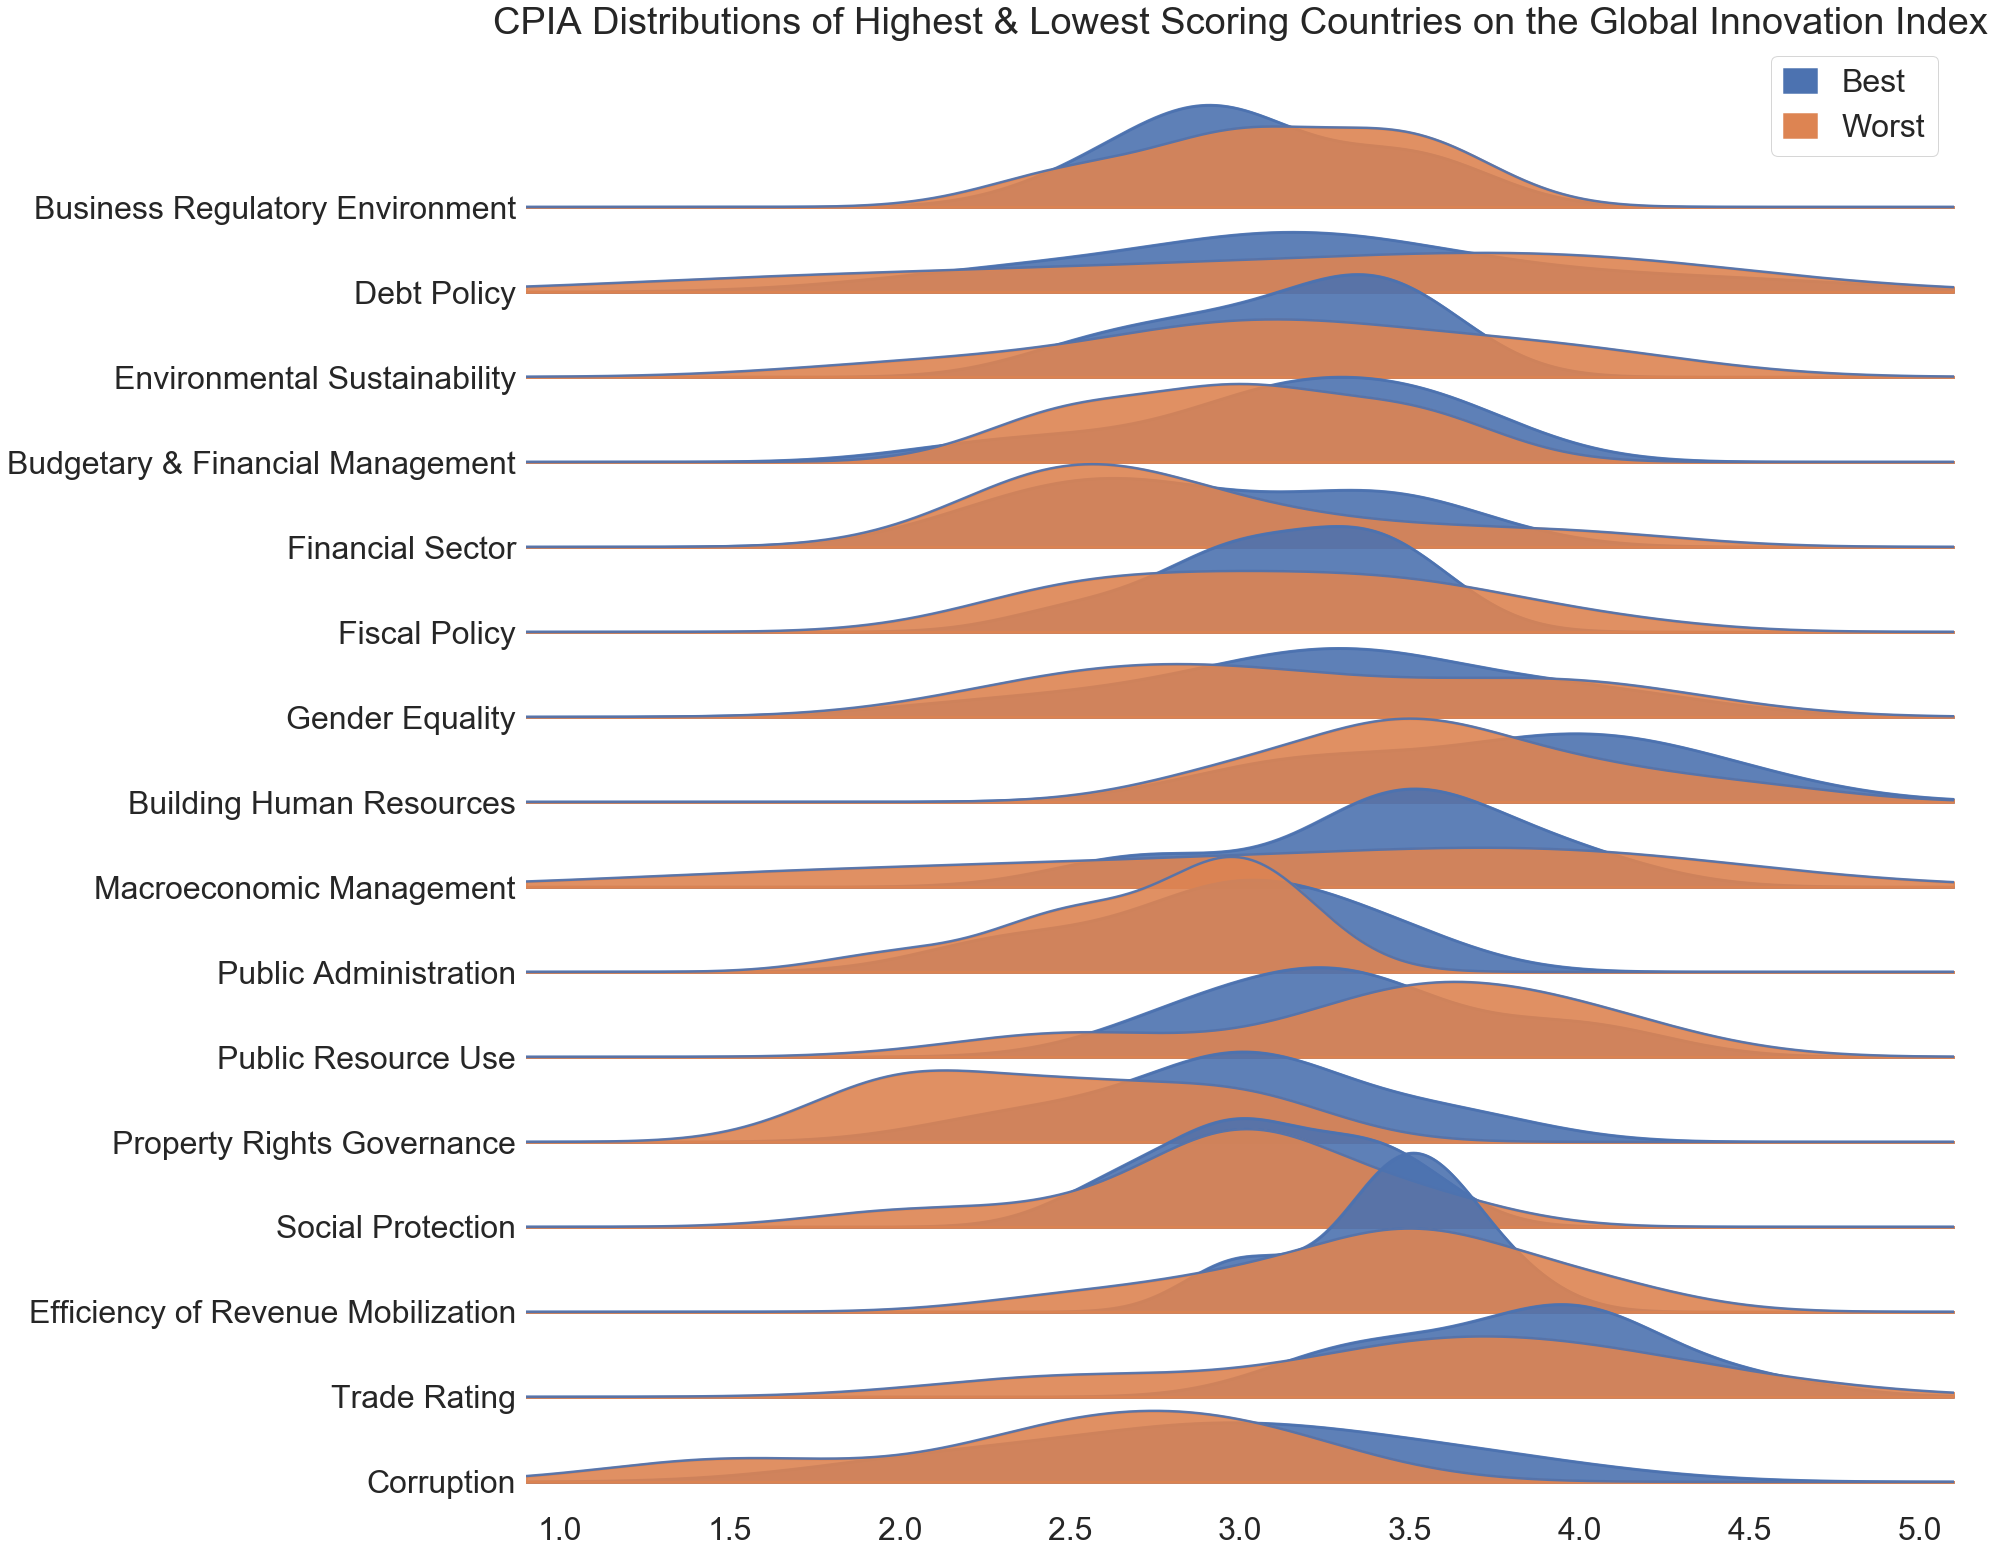

<IPython.core.display.Javascript object>

In [24]:
# draw the ridgeline plot
plt.figure(figsize=(8, 4), dpi=80)
pal = sns.cubehelix_palette(10, rot=-0.25, light=0.7)
plt.rc("font", size=32)
params = {"legend.fontsize": 32, "legend.handlelength": 1}
plt.rcParams.update(params)
fig, axes = joypy.joyplot(
    best_worst,
    by="indicator_code",
    overlap=1,
    legend=True,
    figsize=(28, 22),
    linecolor="b",
    linewidth=2.5,
    labels=[
        "Business Regulatory Environment",
        "Debt Policy",
        "Environmental Sustainability",
        "Budgetary & Financial Management",
        "Financial Sector",
        "Fiscal Policy",
        "Gender Equality",
        "Building Human Resources",
        "Macroeconomic Management",
        "Public Administration",
        "Public Resource Use",
        "Property Rights Governance",
        "Social Protection",
        "Efficiency of Revenue Mobilization",
        "Trade Rating",
        "Corruption",
    ],
    alpha=0.9,
)
# Decoration
plt.title(
    "CPIA Distributions of Highest & Lowest Scoring Countries on the Global Innovation Index",
    fontsize=38,
)
plt.show()

#### The position of the best and worst clusters for Public Resource Useis of note, as it appears that the worst performers may actually be scoring higher in this category than the best performers. On the other hand, Property Rights Governance indicates a much lower score for the worst performers. One may conclude that when it comes to innovation, meeting individual needs may be of greater importance than providing for the public as a whole.<br><br>Macroeconomic Management is also of interest. Scores tend to be concentrated at around 3.5-4.0 for the best performers, while the worst performers have a more distributed spread of scores. Scores for Trade follow a similar pattern, indicating that these may be factors in contributing to an environment conducive to innovation.

## Considering the Biggest Differences between Summed Best and Worst CPIA Indicators

In [25]:
# pivot the best performers dataframe
best_shared_pivot = best_shared.pivot_table(
    index=["country_name"], columns=["indicator_code"], values=["value"]
)

<IPython.core.display.Javascript object>

In [26]:
# rename the columns
best_shared_pivot.columns = [
    [
        "Business Regulatory Environment",
        "Debt Policy",
        "Environmental Sustainability",
        "Budgetary & Financial Management",
        "Financial Sector",
        "Fiscal Policy",
        "Gender Equality",
        "Building Human Resources",
        "Macroeconomic Management",
        "Public Administration",
        "Public Resource Use",
        "Property Rights Governance",
        "Social Protection",
        "Efficiency of Revenue Mobilization",
        "Trade Rating",
        "Corruption",
    ]
]

<IPython.core.display.Javascript object>

In [27]:
# sum the best performers dataframe
best_shared_sum = best_shared_pivot.sum(axis=0)
best_shared_sum

Business Regulatory Environment       30.426316
Debt Policy                           32.144361
Environmental Sustainability          31.415883
Budgetary & Financial Management      31.470959
Financial Sector                      29.062030
Fiscal Policy                         31.288158
Gender Equality                       32.759211
Building Human Resources              37.704605
Macroeconomic Management              34.209492
Public Administration                 29.442763
Public Resource Use                   33.312876
Property Rights Governance            29.962688
Social Protection                     30.804511
Efficiency of Revenue Mobilization    34.286278
Trade Rating                          38.225282
Corruption                            29.383741
dtype: float64

<IPython.core.display.Javascript object>

In [28]:
# pivot the worst performers dataframe
worst_shared_pivot = worst_shared.pivot_table(
    index=["country_name"], columns=["indicator_code"], values=["value"]
)

<IPython.core.display.Javascript object>

In [29]:
# rename the columns
worst_shared_pivot.columns = [
    [
        "Business Regulatory Environment",
        "Debt Policy",
        "Environmental Sustainability",
        "Budgetary & Financial Management",
        "Financial Sector",
        "Fiscal Policy",
        "Gender Equality",
        "Building Human Resources",
        "Macroeconomic Management",
        "Public Administration",
        "Public Resource Use",
        "Property Rights Governance",
        "Social Protection",
        "Efficiency of Revenue Mobilization",
        "Trade Rating",
        "Corruption",
    ]
]

<IPython.core.display.Javascript object>

In [30]:
# sum the worst performers dataframe
worst_shared_sum = worst_shared_pivot.sum(axis=0)
worst_shared_sum

Business Regulatory Environment       31.0
Debt Policy                           31.5
Environmental Sustainability          31.5
Budgetary & Financial Management      30.0
Financial Sector                      28.5
Fiscal Policy                         31.0
Gender Equality                       32.0
Building Human Resources              36.0
Macroeconomic Management              31.5
Public Administration                 27.5
Public Resource Use                   34.5
Property Rights Governance            24.5
Social Protection                     29.5
Efficiency of Revenue Mobilization    34.0
Trade Rating                          35.5
Corruption                            25.0
dtype: float64

<IPython.core.display.Javascript object>

In [31]:
# subtract the worst summed from the best summed
differences = best_shared_sum.sub(worst_shared_sum)
differences = differences.sort_values()
differences_df = pd.DataFrame(differences)
differences_df = differences_df.reset_index()
differences_df.columns = [["CPIA Indicator", "Differences in Best & Worst"]]

<IPython.core.display.Javascript object>

In [32]:
differences_df.columns = differences_df.columns.get_level_values(0)

<IPython.core.display.Javascript object>

In [33]:
differences_df

,CPIA Indicator,Differences in Best & Worst
0,Public Resource Use,-1.187124
1,Business Regulatory Environment,-0.573684
2,Environmental Sustainability,-0.084117
3,Efficiency of Revenue Mobilization,0.286278
4,Fiscal Policy,0.288158
5,Financial Sector,0.562030
6,Debt Policy,0.644361
7,Gender Equality,0.759211
8,Social Protection,1.304511
9,Budgetary & Financial Management,1.470959


<IPython.core.display.Javascript object>

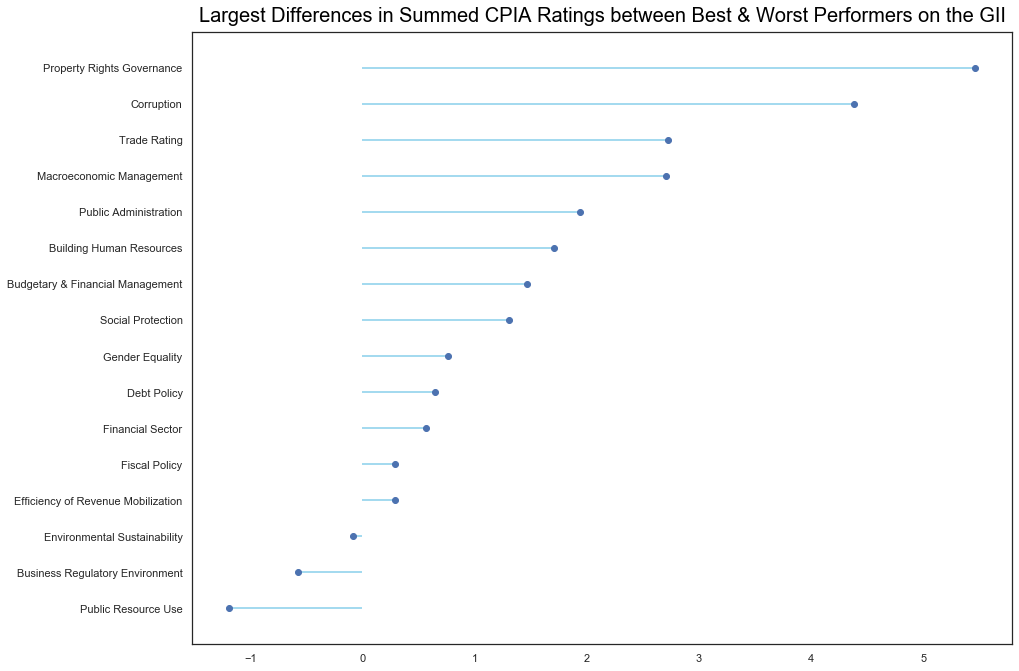

<IPython.core.display.Javascript object>

In [34]:
# draw the lollipop stem chart
plt.hlines(
    y=differences_df["CPIA Indicator"],
    xmin=0,
    xmax=differences_df["Differences in Best & Worst"],
    color="skyblue",
)
plt.ylim([-1, 16])
title_font = {
    "size": "20",
    "color": "black",
    "weight": "normal",
    "verticalalignment": "bottom",
}
plt.title(
    "Largest Differences in Summed CPIA Ratings between Best & Worst Performers on the GII",
    title_font,
)
plt.plot(
    differences_df["Differences in Best & Worst"],
    differences_df["CPIA Indicator"],
    "o",
)

This final graphic indicates which CPIA factors may have influence in determining a country or region's ranking on the Global Innovation Index. The largest observed difference in scores between the top and bottom performers on the Global Innovation Index is Property Rights Governance. This indicates that management in this area may be critical to a region's success or failure in creating an environment conducive to innovation.
<br><br>Per the World Bank: _"Property rights and rule-based governance assess the extent to which private economic activity is facilitated by an effective legal system and rule-based governance structure in which property and contract rights are reliably respected and enforced."_
    <br>
    <br>Given this description, it's no surprise that Corruption is the second most important factor in determining a region's environment for innovation. This makes sense given that firms engage in innovation in order to see future benefits. Corruption prevents credit from being applied where it's due and may in fact increase the cost of innovating as well.
    <br><br>The CPIA Trade and Macroeconomic Management Ratings tie for third and fouth. Per the World Bank:
     <br> _"Trade assesses how the policy framework fosters trade in goods."_
     <br> _"Macroeconomic management assesses the monetary, exchange rate, and aggregate demand policy framework."_
    <br><br>Further research on factors influencing innovation indicate the implementation of an innovative idea to be just as important as the idea itself. It follows that a region's general economic environment would play a role in determing whether ideas conceived may be brought to fruition.
    <br><br>The small difference between best and worst performers returned for the **Business Regulatory Rating** was surprising given the much larger differences seen with the Property rights and rule-based governance and the Corruption ratings. The World Bank describes the Business Regulatory rating to: _"assess the extent to which the legal, regulatory, and policy environments help or hinder private businesses in investing, creating jobs, and becoming more productive"._ This is an element that would certainly warrant further investigation in another study.
</font>